In [1]:
import glob
import os

import cv2
from PIL import Image
import numpy as np

In [8]:
jpg_pat = 'seiga-thumb/*/*.jpg'

In [9]:
files = glob.glob(jpg_pat)

In [4]:
! test -f lbpcascade_animeface.xml || wget https://raw.githubusercontent.com/nagadomi/lbpcascade_animeface/master/lbpcascade_animeface.xml

--2020-11-24 18:01:27--  https://raw.githubusercontent.com/nagadomi/lbpcascade_animeface/master/lbpcascade_animeface.xml
raw.githubusercontent.com (raw.githubusercontent.com) をDNSに問いあわせています... 151.101.228.133
raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 246945 (241K) [text/plain]
`lbpcascade_animeface.xml' に保存中

lbpcascade_animefac 100%[===================>] 241.16K  --.-KB/s 時間 0.03s    

2020-11-24 18:01:27 (8.67 MB/s) - `lbpcascade_animeface.xml' へ保存完了 [246945/246945]



In [5]:
cascade = cv2.CascadeClassifier("lbpcascade_animeface.xml")

In [6]:
def detect(fname):
    image = cv2.imread(fname, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    faces = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)# , minsize=(24, 24))
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    rgb_cv = image[:, :, ::-1].copy()
    img = Image.fromarray(rgb_cv)
    return img

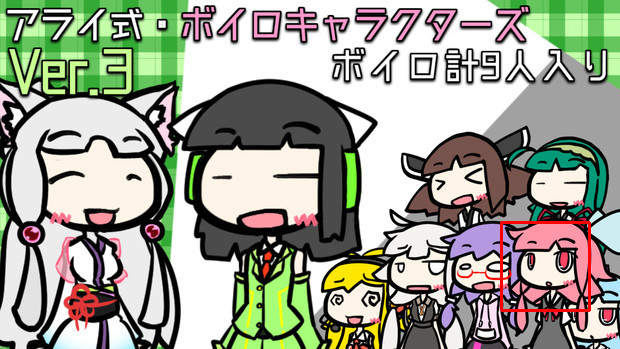

In [10]:
img = detect(files[0])
img